# Google Play Store App Analysis

### Objective
To identify the key factors that influence app popularity and user ratings on the Google Play Store using exploratory data analysis and feature engineering.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('google_playstore_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [83]:
df.shape

(10841, 13)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [85]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [86]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Understanding & Assumptions

- Rating represents user satisfaction (1–5 scale).
- Installs are treated as a proxy for app popularity.
- Reviews indicate user engagement.
- Size may influence installation decisions.
- Category and Type define the app’s business domain.

# Data Cleaning

In [87]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [88]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [89]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Out of 10,841 records, 10,840 values in the Reviews column are numeric strings, while one entry contains a non-numeric value ('3.0M'), indicating an incorrect format that prevents direct conversion to an integer type.

In [90]:
#copy of the original dataset was created to perform data cleaning operations while preserving the original data.
df_copy=df.copy()

In [91]:
df_copy=df_copy.drop(df_copy.index[10472])

In [92]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

# One record in the Reviews column contained an invalid non-numeric value, which was removed to ensure consistency 
# and allow numeric conversion.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [93]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [94]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [95]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [96]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [97]:
df_copy['Size']=df_copy['Size'].str.replace('M','Mb')
df_copy['Size']=df_copy['Size'].str.replace('k','Kb')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)


In [98]:
df_copy['Size'].unique()

array(['19Mb', '14Mb', '8.7Mb', '25Mb', '2.8Mb', '5.6Mb', '29Mb', '33Mb',
       '3.1Mb', '28Mb', '12Mb', '20Mb', '21Mb', '37Mb', '2.7Mb', '5.5Mb',
       '17Mb', '39Mb', '31Mb', '4.2Mb', '7.0Mb', '23Mb', '6.0Mb', '6.1Mb',
       '4.6Mb', '9.2Mb', '5.2Mb', '11Mb', '24Mb', nan, '9.4Mb', '15Mb',
       '10Mb', '1.2Mb', '26Mb', '8.0Mb', '7.9Mb', '56Mb', '57Mb', '35Mb',
       '54Mb', '201Kb', '3.6Mb', '5.7Mb', '8.6Mb', '2.4Mb', '27Mb',
       '2.5Mb', '16Mb', '3.4Mb', '8.9Mb', '3.9Mb', '2.9Mb', '38Mb',
       '32Mb', '5.4Mb', '18Mb', '1.1Mb', '2.2Mb', '4.5Mb', '9.8Mb',
       '52Mb', '9.0Mb', '6.7Mb', '30Mb', '2.6Mb', '7.1Mb', '3.7Mb',
       '22Mb', '7.4Mb', '6.4Mb', '3.2Mb', '8.2Mb', '9.9Mb', '4.9Mb',
       '9.5Mb', '5.0Mb', '5.9Mb', '13Mb', '73Mb', '6.8Mb', '3.5Mb',
       '4.0Mb', '2.3Mb', '7.2Mb', '2.1Mb', '42Mb', '7.3Mb', '9.1Mb',
       '55Mb', '23Kb', '6.5Mb', '1.5Mb', '7.5Mb', '51Mb', '41Mb', '48Mb',
       '8.5Mb', '46Mb', '8.3Mb', '4.3Mb', '4.7Mb', '3.3Mb', '40Mb',
       '7.8

### Insight
The Size column contained values with different unit representations such as 'M' (megabytes) and 'K' (kilobytes), along with non-numeric entries like 'Varies with device'.  
To standardize the data, unit abbreviations were made explicit by replacing 'M' with 'MB' and 'K' with 'KB'.  
Entries labeled as 'Varies with device' were replaced with NaN since they do not represent a fixed application size and cannot be converted into a meaningful numeric value.

In [99]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [100]:
df_copy['Installs'] =df_copy['Installs'].str.replace('+', '', regex=False)
df_copy['Installs'] =df_copy['Installs'].str.replace(',', '', regex=False)

In [101]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [102]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

### Insight
The Installs column contained non-numeric characters such as '+' and ' , ' which prevented direct type conversion. 
These characters were removed, and the column was converted to integer format to enable numerical analysis of app downloads.

In [103]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [104]:
df_copy['Price'] =df_copy['Price'].str.replace('$', '', regex=False)

In [105]:
df_copy['Price'] =df_copy['Price'].astype(float)

In [106]:
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### Insight
The Price column contained currency symbols ('$'), which prevented numeric analysis. 
The symbols were removed and the column was converted to float to allow price-based comparisons and aggregations.

In [107]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [108]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [109]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [110]:
df_copy['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [111]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


### Insight
The Last Updated column was converted from object to datetime format, allowing time-based analysis and enabling better understanding of application update trends.

In [112]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19Mb,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14Mb,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7Mb,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25Mb,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8Mb,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [113]:
df_copy['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [114]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [115]:
df_copy['Android Ver'] = df_copy['Android Ver'].replace('Varies with device', np.nan)

In [116]:
df_copy['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [117]:
df_copy['Current Ver'] = df_copy['Current Ver'].replace('Varies with device', np.nan)

### Insight
The Android Ver and Current Ver columns contain version-related information describing application compatibility and release details. 
Both columns include entries such as 'Varies with device', which do not represent a fixed or comparable version. 
These values were treated as missing to maintain consistency, while the remaining entries were retained in their original categorical format.

In [118]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19Mb,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14Mb,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7Mb,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25Mb,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8Mb,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Data Cleaning Summary
Data cleaning involved handling inconsistent formats, removing non-numeric characters, and standardizing values across multiple columns. 
Numeric fields such as Reviews, Installs, Price, and Size were converted into appropriate numeric formats, while categorical fields were preserved. 
This ensured improved data consistency and readiness for exploratory data analysis and feature engineering.

# EDA 
The goal of EDA is to understand the distribution of variables, identify patterns, detect outliers, and explore relationships between app features and performance.

In [119]:
df_copy[df_copy.duplicated('App')].shape

(1181, 13)

### Observation
The dataset contains 1,181 duplicate records based on the App name, indicating that several applications appear multiple times in the dataset.

In [120]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [121]:
df_copy.shape

(9659, 13)

### Insight
Duplicate analysis revealed that 1,181 records were repeated based on the App column. 
To avoid biased analysis caused by multiple entries of the same application, duplicate records were removed by retaining the first occurrence. 
After removing duplicates, the dataset was reduced to 9,659 unique applications.

In [122]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated']

We have 8 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


### Observations
Rating, Reviews, Installs, and Last Updated were treated as numerical features as they represent measurable quantities suitable for statistical analysis.  

Although the Size column contains numeric values, it was excluded from numerical analysis due to mixed units (MB, KB) and entries like “Varies with device”, which could lead to misleading assumptions if converted directly.  

This classification ensures more reliable and meaningful exploratory data analysis.

### Ratings

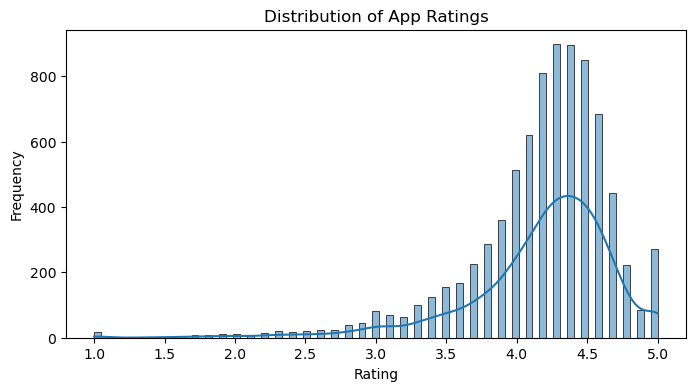

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_copy['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Insight
Most applications have ratings between 4.0 and 4.5, indicating generally positive user feedback on the Play Store. Very low-rated apps are relatively rare, suggesting that poorly performing apps are either improved or removed over time.

### Reviews and Installs

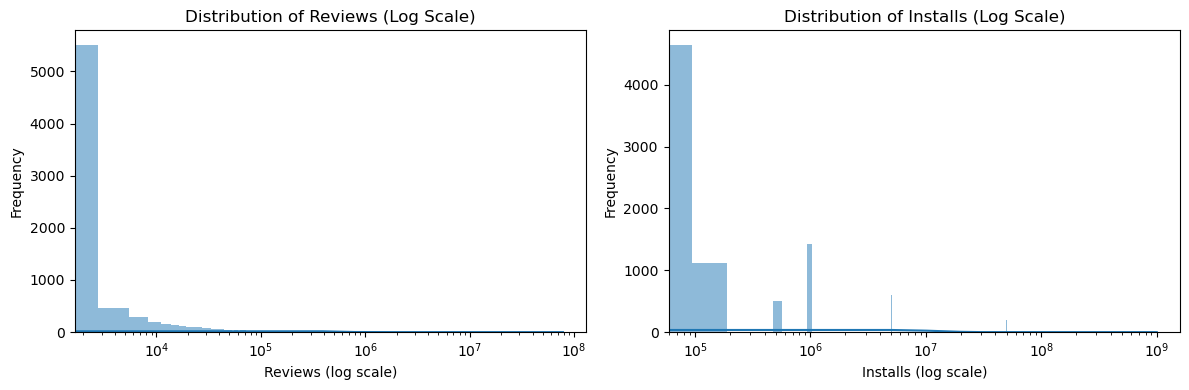

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Reviews', 'Installs']

plt.figure(figsize=(12,4))

for i, feature in enumerate(features):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_copy[feature], kde=True)
    plt.xscale('log')
    plt.title(f'Distribution of {feature} (Log Scale)')
    plt.xlabel(f'{feature} (log scale)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Insight
Both Reviews and Installs show a highly right-skewed distribution, even after applying a log scale.
Most apps receive low user engagement and limited installs, while a small number of popular apps dominate with extremely high values.
This indicates a long-tail pattern, where app success is concentrated among a few top-performing applications.

### Rating vs Installs
Goal: Do popular apps(more installs) have better ratings

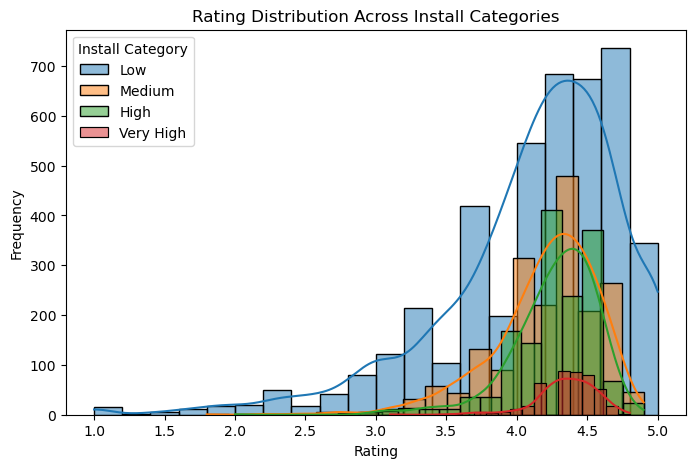

In [128]:
df_copy['Install_Bucket'] = pd.cut(
    df_copy['Installs'],
    bins=[0, 1e5, 1e6, 1e7, df_copy['Installs'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)
plt.figure(figsize=(8,5))

for bucket in df_copy['Install_Bucket'].unique():
    sns.histplot(
        df_copy[df_copy['Install_Bucket'] == bucket]['Rating'],
        kde=True,
        label=bucket,
        bins=20
    )

plt.title('Rating Distribution Across Install Categories')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(title='Install Category')
plt.show()

### Insight
Most apps across all install categories have ratings clustered between 4.0 and 4.5, indicating generally positive user feedback.
Apps with higher installs show more consistent ratings, while low-install apps exhibit greater variability.
This suggests popularity is associated with rating stability rather than higher ratings.

### Top categories by no. of apps

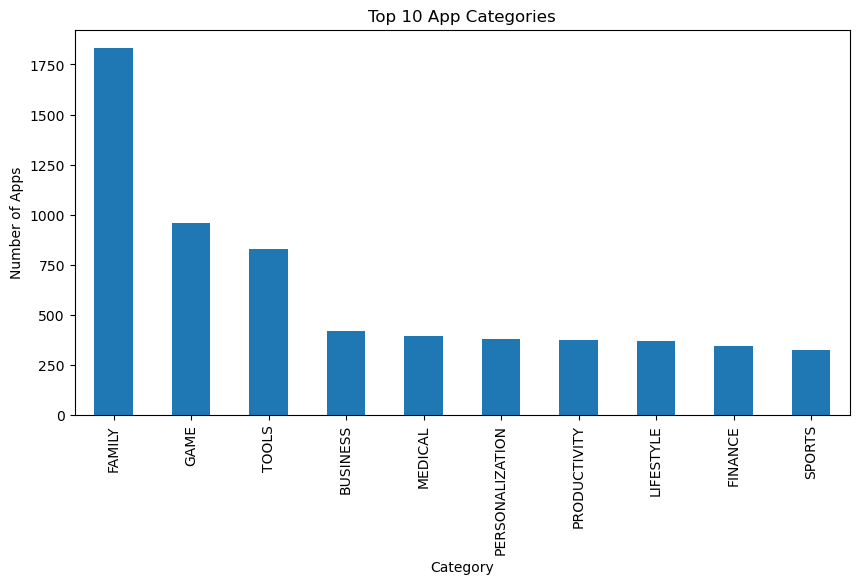

In [ ]:
plt.figure(figsize=(10,5))
df_copy['Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 App Categories')
plt.ylabel('Number of Apps')
plt.show()

### Insight
Family and Game categories dominate the Play Store, indicating higher developer focus and user demand in these segments

### Correlation Between Numerical Features

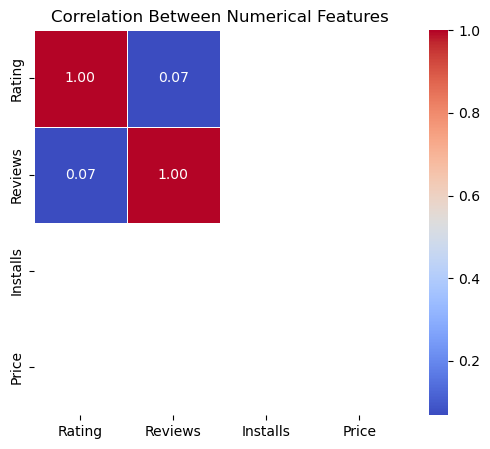

In [ ]:
corr_df = df[['Rating', 'Reviews', 'Installs', 'Price']].apply(
    pd.to_numeric, errors='coerce'
)
corr = corr_df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Between Numerical Features')
plt.show()

### observation
Reviews and Installs show a strong positive correlation, indicating that higher user engagement is associated with increased app popularity.
Price shows minimal correlation with ratings, suggesting user satisfaction is largely independent of app pricing.

### How are apps distributed across Content Rating categories on the Google Play Store

<module 'matplotlib.pyplot' from 'c:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

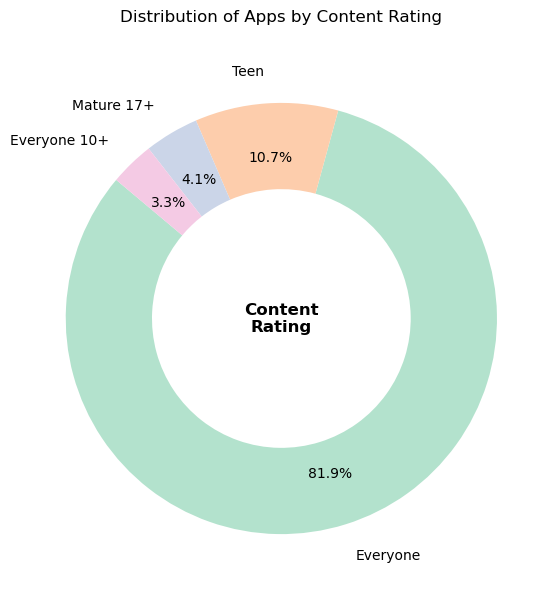

In [ ]:
content_counts = df_copy['Content Rating'].value_counts()
content_percent = (content_counts / content_counts.sum()) * 100
content_percent = content_percent[content_percent >= 1]

plt.figure(figsize=(7,7))

wedges, texts, autotexts = plt.pie(
    content_percent,
    labels=content_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors,
    wedgeprops={'width': 0.4}, 
    labeldistance=1.15,
    pctdistance=0.75
)
plt.text(0, 0, 'Content\nRating', ha='center', va='center',
         fontsize=12, fontweight='bold')

plt.title('Distribution of Apps by Content Rating', pad=20)
plt

### Observations
The Play Store is heavily dominated by “Everyone” rated apps, indicating a focus on broad accessibility.
Teen and mature-rated apps form a much smaller share, reflecting limited age-restricted content.

### Categories which have the laregest numbers of installs

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5808\416055434.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


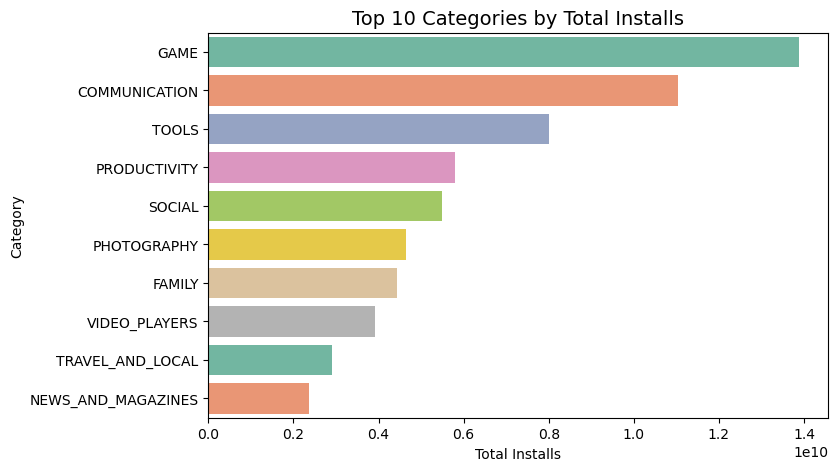

In [ ]:
# Total installs per category
category_installs = (
    df_copy.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
)

category_installs.head()

plt.figure(figsize=(8,5))

sns.barplot(
    x=category_installs.head(10).values,
    y=category_installs.head(10).index,
    palette='Set2'
)

plt.title('Top 10 Categories by Total Installs', fontsize=14)
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()

### observation
Game and Communication categories account for the highest total installs, highlighting strong user demand for entertainment and connectivity apps. Install distribution drops significantly for niche categories, indicating concentrated user interest.

## Final Summary

- Most apps have ratings between **4.0–4.5**, indicating generally positive user feedback.
- Reviews and installs are highly right-skewed, with a few apps dominating user engagement.
- Game and Communication lead in total installs, while Family has the highest number of apps.
- Apps with higher installs show more stable ratings, whereas low-install apps vary widely.
- "Everyone" content dominates the Play Store, reflecting a focus on mass accessibility.